In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [9]:
Gebaude_AM = ['hka-aqm-am001', 'hka-aqm-am002',
       'hka-aqm-am003a', 'hka-aqm-am003b', 'hka-aqm-am004',
       'hka-aqm-am005', 'hka-aqm-am107', 'hka-aqm-am109', 'hka-aqm-am110',
       'hka-aqm-am111', 'hka-aqm-am115', 'hka-aqm-am116', 'hka-aqm-am117',
       'hka-aqm-am123', 'hka-aqm-am124', 'hka-aqm-am126',
       'hka-aqm-am201a', 'hka-aqm-am201b', 'hka-aqm-am204',
       'hka-aqm-am205', 'hka-aqm-am209', 'hka-aqm-am210', 'hka-aqm-am211',
       'hka-aqm-am301', 'hka-aqm-am307', 'hka-aqm-am308']

In [21]:
df = pd.read_csv("aggregated_hourly.csv")
df = df.loc[~df['device_id'].isin(Gebaude_AM)]
df["date_time"] = pd.to_datetime(df["date_time"])
df.head()

device_id           date_time        tmp      hum       snr  CO2  VOC  \
0  hka-aqm-a014 2022-10-10 14:00:00  23.902895  47.4050  8.678947  532  464   
1  hka-aqm-a014 2022-10-10 15:00:00  24.793750  43.1975  8.662500  509  477   
2  hka-aqm-a014 2022-10-10 16:00:00  24.856000  44.1520  8.160000  477  535   
3  hka-aqm-a014 2022-10-10 17:00:00  24.860000  45.9825  8.200000  493  566   
4  hka-aqm-a014 2022-10-10 18:00:00  24.824000  48.7540  8.800000  512  744   

    vis   IR  WIFI  ...  spreading_factor  bandwidth  f_cnt  \
0  1596  331     2  ...                 7     125000     40   
1   464   59     2  ...                 7     125000     50   
2   397   42     2  ...                 7     125000     55   
3   384   39     1  ...                 7     125000     59   
4   384   37     2  ...                 7     125000     64   

   gateway_drag-lps8-01  gateway_drag-lps8-02  gateway_drag-lps8-03  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     1                     0                     0   
3                     1                     0                     0   
4                     1                     0                     0   

   gateway_drag-lps8-05  gateway_drag-lps8-07  gateway_drag-lps8-08  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   gateway_drag-outd-01  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 24 columns]

In [14]:
#Spaltenanzahl
df.shape

(41589, 24)

### Haben insgesamt 24 Spalten mit 41589 Zeilen

### Die Zeilen setzen sich aus den verschiedenen Stunden aus 10 Räumen zusammen

In [11]:
df.describe()

tmp           hum           snr           CO2           VOC  \
count  41589.000000  41589.000000  41589.000000  41589.000000  41589.000000   
mean      24.118534     38.112129     -2.144808    507.607324   1016.717906   
std        3.473707     10.043505      6.092828    191.860758    470.803609   
min       14.187500     14.070000    -20.300000    258.000000    450.000000   
25%       21.775000     30.632500     -6.500000    435.000000    722.000000   
50%       23.460000     37.125000     -2.557895    459.000000    873.000000   
75%       26.595000     45.300000      1.400000    508.000000   1157.000000   
max      150.146667    115.716667     11.575000  13523.000000  14913.000000   

                vis            IR          WIFI           BLE          rssi  \
count  41589.000000  41589.000000  41589.000000  41589.000000  41589.000000   
mean     220.932699     66.921373      3.067927     12.427349   -107.439972   
std     1362.904881    404.588131      1.404635     17.420611     20.634455   
min        4.000000      0.000000      0.000000      0.000000   -138.000000   
25%        8.000000      2.000000      2.000000      1.000000   -120.000000   
50%       18.000000      4.000000      3.000000      6.000000   -113.000000   
75%      160.000000     43.000000      4.000000     16.000000   -107.000000   
max    57194.000000  17152.000000     13.000000    134.000000    -38.000000   

       ...  spreading_factor  bandwidth         f_cnt  gateway_drag-lps8-01  \
count  ...      41589.000000    41589.0  41589.000000          41589.000000   
mean   ...          7.793070   125000.0  10746.380870              0.128736   
std    ...          1.292687        0.0  10962.721068              0.334911   
min    ...          7.000000   125000.0      1.000000              0.000000   
25%    ...          7.000000   125000.0   1870.000000              0.000000   
50%    ...          7.000000   125000.0   5942.000000              0.000000   
75%    ...          8.000000   125000.0  18360.000000              0.000000   
max    ...         12.000000   125000.0  44671.000000              1.000000   

       gateway_drag-lps8-02  gateway_drag-lps8-03  gateway_drag-lps8-05  \
count          41589.000000          41589.000000               41589.0   
mean               0.562168              0.000096                   0.0   
std                0.496126              0.009807                   0.0   
min                0.000000              0.000000                   0.0   
25%                0.000000              0.000000                   0.0   
50%                1.000000              0.000000                   0.0   
75%                1.000000              0.000000                   0.0   
max                1.000000              1.000000                   0.0   

       gateway_drag-lps8-07  gateway_drag-lps8-08  gateway_drag-outd-01  
count          41589.000000          41589.000000          41589.000000  
mean               0.245810              0.316502              0.734281  
std                0.430572              0.465117              0.441721  
min                0.000000              0.000000              0.000000  
25%                0.000000              0.000000              0.000000  
50%                0.000000              0.000000              1.000000  
75%                0.000000              1.000000              1.000000  
max                1.000000              1.000000              1.000000  

[8 rows x 22 columns]

### Wir besitzen temporäre Lücken in den Daten

In [17]:
px.scatter(df, x='date_time', y='tmp', color='device_id')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'device_id=hka-aqm-a014<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a014',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a014',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2022-10-10 14:00:00', '2022-10-10 15:00:00', '2022-10-10 16:00:00',
                          ..., '2022-12-15 10:00:00', '2022-12-15 11:00:00',
                          '2022-12-15 12:00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([23.90289474, 24.79375   , 24.856     , ..., 21.75      , 21.785     ,
                          21.80666667]),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a017<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a017',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a017',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2022-10-20 11:00:00', '2022-10-20 12:00:00', '2022-10-20 13:00:00',
                          ..., '2023-10-01 21:00:00', '2023-10-01 22:00:00',
                          '2023-10-01 23:00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([23.615 , 23.7325, 23.7625, ..., 24.5475, 24.4925, 24.42  ]),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a101<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a101',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a101',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2022-10-10 14:00:00', '2022-10-10 15:00:00', '2022-10-10 16:00:00',
                          ..., '2023-10-01 21:00:00', '2023-10-01 22:00:00',
                          '2023-10-01 23:00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([24.16050847, 24.674     , 24.616     , ..., 25.0575    , 25.09      ,
                          25.12666667]),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a102<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a102',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a102',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2023-06-29 16:00:00', '2023-06-29 17:00:00', '2023-06-29 18:00:00',
                          ..., '2023-10-01 21:00:00', '2023-10-01 22:00:00',
                          '2023-10-01 23:00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([22.805     , 23.505     , 23.5       , ..., 23.905     , 23.8225    ,
                          23.73666667]),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a103<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a103',
              'marker': {'color': '#FFA15A', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a103',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2022-10-10 14:00:00', '2022-10-10 15:00:00', '2022-10-10 16:00:00',
                          ..., '2023-10-01 21:00:00', '2023-10-01 22:00:00',
                          '2023-10-01 23:00:00'], dtype=object),
              'xaxis': 'x',
              'y': array([24.1875    , 24.8775    , 24.83142857, ..., 22.86      , 22.685     ,
                          22.5125    ]),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a106<br>date_time=%{x}<br>tmp=%{y}<extra></extra>',
              'lege

Diese Lücken bestehen als größere Lücken generel und auch zwischen einzelnen Räumen, siehe Vergleich Raum 017

In [ ]:
df["number_days"] = 0
for i in df.device_id.unique():
    df.loc[df.device_id == i, "number_days"] = df

In [33]:
df["date"] = df["date_time"].dt.date
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date_time"].dt.year
df.dtypes

device_id                       object
date_time               datetime64[ns]
tmp                            float64
hum                            float64
snr                            float64
CO2                              int64
VOC                              int64
vis                              int64
IR                               int64
WIFI                             int64
BLE                              int64
rssi                             int64
channel_rssi                     int64
channel_index                    int64
spreading_factor                 int64
bandwidth                        int64
f_cnt                            int64
gateway_drag-lps8-01             int64
gateway_drag-lps8-02             int64
gateway_drag-lps8-03             int64
gateway_drag-lps8-05             int64
gateway_drag-lps8-07             int64
gateway_drag-lps8-08             int64
gateway_drag-outd-01             int64
date                    datetime64[ns]
year                     

- Sunburst mit wie viel % an Tagen pro Raum 

In [62]:
df_daysmissing = df.groupby(["device_id","year"]).nunique()[["date"]].reset_index()
df_daysmissing["total_days_2022"] = (pd.to_datetime("2022-12-31") - df.date.min()).days
df_daysmissing["total_days_2023"] = (df.date.max() - pd.to_datetime("2023-01-01")).days
df_daysmissing["missing_days"] = 0
for i in df.year.unique():
    if i == 2022:
        df_daysmissing.loc[df_daysmissing.year == i, "missing_days"] = (df_daysmissing.total_days_2022 - df_daysmissing.date)/df_daysmissing.total_days_2022
    else:
        df_daysmissing.loc[df_daysmissing.year == i, "missing_days"] = (df_daysmissing.total_days_2023 - df_daysmissing.date)/df_daysmissing.total_days_2023
df_daysmissing

C:\Users\paulh\AppData\Local\Temp\ipykernel_16968\3208157335.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.75213675 0.37606838 0.75213675 0.75213675 0.75213675 0.74358974
 0.75213675 0.75213675]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



device_id  year  date  total_days_2022  total_days_2023  missing_days
0   hka-aqm-a014  2022    29              117              273      0.752137
1   hka-aqm-a017  2022    73              117              273      0.376068
2   hka-aqm-a017  2023   216              117              273      0.208791
3   hka-aqm-a101  2022    29              117              273      0.752137
4   hka-aqm-a101  2023   205              117              273      0.249084
5   hka-aqm-a102  2023    44              117              273      0.838828
6   hka-aqm-a103  2022    29              117              273      0.752137
7   hka-aqm-a103  2023   204              117              273      0.252747
8   hka-aqm-a106  2022    29              117              273      0.752137
9   hka-aqm-a106  2023   204              117              273      0.252747
10  hka-aqm-a107  2022    30              117              273      0.743590
11  hka-aqm-a107  2023   204              117              273      0.252747
12  hka-aqm-a108  2022    29              117              273      0.752137
13  hka-aqm-a108  2023   204              117              273      0.252747
14  hka-aqm-a111  2023    44              117              273      0.838828
15  hka-aqm-a112  2022    29              117              273      0.752137
16  hka-aqm-a112  2023   204              117              273      0.252747

In [63]:
px.sunburst(df_daysmissing, path=['year', 'device_id'], values='missing_days')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': ('labels=%{label}<br>missing_day' ... 'nt}<br>id=%{id}<extra></extra>'),
              'ids': array(['2022/hka-aqm-a014', '2022/hka-aqm-a017', '2023/hka-aqm-a017',
                            '2022/hka-aqm-a101', '2023/hka-aqm-a101', '2023/hka-aqm-a102',
                            '2022/hka-aqm-a103', '2023/hka-aqm-a103', '2022/hka-aqm-a106',
                            '2023/hka-aqm-a106', '2022/hka-aqm-a107', '2023/hka-aqm-a107',
                            '2022/hka-aqm-a108', '2023/hka-aqm-a108', '2023/hka-aqm-a111',
                            '2022/hka-aqm-a112', '2023/hka-aqm-a112', '2022', '2023'], dtype=object),
              'labels': array(['hka-aqm-a014', 'hka-aqm-a017', 'hka-aqm-a017', 'hka-aqm-a101',
                               'hka-aqm-a101', 'hka-aqm-a102', 'hka-aqm-a103', 'hka-aqm-a103',
                               'hka-aqm-a106', 'hka-aqm-a106', 'hka-aqm-a107', 'hka-aqm-a107',
                               'hka-aqm-a108', 'hka-aqm-a108', 'hka-aqm-a111', 'hka-aqm-a112',
                               'hka-aqm-a112', '2022', '2023'], dtype=object),
              'name': '',
              'parents': array(['2022', '2022', '2023', '2022', '2023', '2023', '2022', '2023', '2022',
                                '2023', '2022', '2023', '2022', '2023', '2023', '2022', '2023', '', ''],
                               dtype=object),
              'type': 'sunburst',
              'values': array([0.75213675, 0.37606838, 0.20879121, 0.75213675, 0.24908425, 0.83882784,
                               0.75213675, 0.25274725, 0.75213675, 0.25274725, 0.74358974, 0.25274725,
                               0.75213675, 0.25274725, 0.83882784, 0.75213675, 0.25274725, 5.63247863,
                               3.3992674 ])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

Device Ids that only have values in one year

In [64]:
device_ids = df.groupby('device_id')['year'].nunique()
device_ids = device_ids[device_ids == 1].index.tolist()
device_ids

['hka-aqm-a014', 'hka-aqm-a102', 'hka-aqm-a111']

In [54]:
df_daysmissing

device_id  year  date
0   hka-aqm-a014  2022    29
1   hka-aqm-a017  2022    73
2   hka-aqm-a017  2023   216
3   hka-aqm-a101  2022    29
4   hka-aqm-a101  2023   205
5   hka-aqm-a102  2023    44
6   hka-aqm-a103  2022    29
7   hka-aqm-a103  2023   204
8   hka-aqm-a106  2022    29
9   hka-aqm-a106  2023   204
10  hka-aqm-a107  2022    30
11  hka-aqm-a107  2023   204
12  hka-aqm-a108  2022    29
13  hka-aqm-a108  2023   204
14  hka-aqm-a111  2023    44
15  hka-aqm-a112  2022    29
16  hka-aqm-a112  2023   204

- Bar chart mit wie viel Stunden am Tag wir im Durchschnitt pro Raum habe


In [69]:
grouped_df = df.groupby(['device_id', 'date']).size().reset_index(name='hours_per_day')
average_hours_per_day = grouped_df.groupby('device_id')[['hours_per_day']].mean()

In [70]:
grouped_df

device_id       date  hours_per_day
0     hka-aqm-a014 2022-10-10             10
1     hka-aqm-a014 2022-10-11             24
2     hka-aqm-a014 2022-10-12             24
3     hka-aqm-a014 2022-10-13             24
4     hka-aqm-a014 2022-10-14             24
...            ...        ...            ...
1801  hka-aqm-a112 2023-09-27             24
1802  hka-aqm-a112 2023-09-28             24
1803  hka-aqm-a112 2023-09-29             24
1804  hka-aqm-a112 2023-09-30             24
1805  hka-aqm-a112 2023-10-01             24

[1806 rows x 3 columns]

In [72]:
px.scatter(grouped_df, x="date", y='hours_per_day',color='device_id')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'device_id=hka-aqm-a014<br>date=%{x}<br>hours_per_day=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a014',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a014',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 10, 10, 0, 0),
                          datetime.datetime(2022, 10, 11, 0, 0),
                          datetime.datetime(2022, 10, 12, 0, 0),
                          datetime.datetime(2022, 10, 13, 0, 0),
                          datetime.datetime(2022, 10, 14, 0, 0),
                          datetime.datetime(2022, 10, 15, 0, 0),
                          datetime.datetime(2022, 10, 16, 0, 0),
                          datetime.datetime(2022, 10, 17, 0, 0),
                          datetime.datetime(2022, 10, 18, 0, 0),
                          datetime.datetime(2022, 10, 19, 0, 0),
                          datetime.datetime(2022, 10, 20, 0, 0),
                          datetime.datetime(2022, 10, 21, 0, 0),
                          datetime.datetime(2022, 10, 22, 0, 0),
                          datetime.datetime(2022, 10, 23, 0, 0),
                          datetime.datetime(2022, 10, 24, 0, 0),
                          datetime.datetime(2022, 10, 25, 0, 0),
                          datetime.datetime(2022, 10, 26, 0, 0),
                          datetime.datetime(2022, 10, 27, 0, 0),
                          datetime.datetime(2022, 10, 28, 0, 0),
                          datetime.datetime(2022, 10, 29, 0, 0),
                          datetime.datetime(2022, 10, 30, 0, 0),
                          datetime.datetime(2022, 10, 31, 0, 0),
                          datetime.datetime(2022, 11, 1, 0, 0),
                          datetime.datetime(2022, 11, 2, 0, 0),
                          datetime.datetime(2022, 11, 3, 0, 0),
                          datetime.datetime(2022, 12, 12, 0, 0),
                          datetime.datetime(2022, 12, 13, 0, 0),
                          datetime.datetime(2022, 12, 14, 0, 0),
                          datetime.datetime(2022, 12, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
                          24, 24, 24, 24, 24, 24, 13,  9, 23, 24, 13], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a017<br>date=%{x}<br>hours_per_day=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a017',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a017',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 10, 20, 0, 0),
                          datetime.datetime(2022, 10, 21, 0, 0),
                          datetime.datetime(2022, 10, 22, 0, 0), ...,
                          datetime.datetime(2023, 9, 29, 0, 0),
                          datetime.datetime(2023, 9, 30, 0, 0),
                          datetime.datetime(2023, 10, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([13, 23, 24, ..., 24, 24, 24], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a101<br>date=%{x}<br>hours_per_day=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a101',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a101',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 10, 10, 0, 0),
                          datetime.datetime(2022, 10, 11, 0, 0),
                          datetime.datetime(2022, 10, 12, 0, 0), ...,
                          datetime.datetime(

Wir haben sehr viele Tage an denen nicht alle 24h als Informationen gegeben sind.

In [75]:
px.bar(average_hours_per_day, x=average_hours_per_day.index, y='hours_per_day')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'device_id=%{x}<br>hours_per_day=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['hka-aqm-a014', 'hka-aqm-a017', 'hka-aqm-a101', 'hka-aqm-a102',
                          'hka-aqm-a103', 'hka-aqm-a106', 'hka-aqm-a107', 'hka-aqm-a108',
                          'hka-aqm-a111', 'hka-aqm-a112'], dtype=object),
              'xaxis': 'x',
              'y': array([22.20689655, 23.6366782 , 23.32905983, 22.86363636, 23.36480687,
                          22.69098712, 21.92307692, 22.9055794 , 22.88636364, 23.36480687]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'device_id'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'hours_per_day'}}}
})

Der niedrigste Wert der durchschnittlichen täglichen Stunden ist in Raum 107

- Funny min und max Werte aufzeigen

In [84]:
df.describe().iloc[:,:-14]

date_time           tmp           hum  \
count                          41589  41589.000000  41589.000000   
mean   2023-04-19 03:38:14.654836736     24.118534     38.112129   
min              2022-09-05 12:00:00     14.187500     14.070000   
25%              2023-02-05 13:00:00     21.775000     30.632500   
50%              2023-04-15 16:00:00     23.460000     37.125000   
75%              2023-07-08 22:00:00     26.595000     45.300000   
max              2023-10-01 23:00:00    150.146667    115.716667   
std                              NaN      3.473707     10.043505   

                snr           CO2           VOC           vis            IR  \
count  41589.000000  41589.000000  41589.000000  41589.000000  41589.000000   
mean      -2.144808    507.607324   1016.717906    220.932699     66.921373   
min      -20.300000    258.000000    450.000000      4.000000      0.000000   
25%       -6.500000    435.000000    722.000000      8.000000      2.000000   
50%       -2.557895    459.000000    873.000000     18.000000      4.000000   
75%        1.400000    508.000000   1157.000000    160.000000     43.000000   
max       11.575000  13523.000000  14913.000000  57194.000000  17152.000000   
std        6.092828    191.860758    470.803609   1362.904881    404.588131   

               WIFI           BLE          rssi  
count  41589.000000  41589.000000  41589.000000  
mean       3.067927     12.427349   -107.439972  
min        0.000000      0.000000   -138.000000  
25%        2.000000      1.000000   -120.000000  
50%        3.000000      6.000000   -113.000000  
75%        4.000000     16.000000   -107.000000  
max       13.000000    134.000000    -38.000000  
std        1.404635     17.420611     20.634455

### Funny temp

In [86]:
df.loc[df.tmp>40]

device_id           date_time         tmp         hum       snr  \
14310  hka-aqm-a103 2022-10-26 00:00:00   82.732778  112.333333  8.488889   
40588  hka-aqm-a112 2023-07-21 13:00:00  150.146667  115.716667 -4.833333   

         CO2    VOC    vis     IR  WIFI  ...  f_cnt  gateway_drag-lps8-01  \
14310  13523   5025   1554      4     2  ...   1887                     1   
40588   9660  14913  37132  17152     4  ...  32625                     0   

       gateway_drag-lps8-02  gateway_drag-lps8-03  gateway_drag-lps8-05  \
14310                     0                     0                     0   
40588                     1                     0                     0   

       gateway_drag-lps8-07  gateway_drag-lps8-08  gateway_drag-outd-01  \
14310                     0                     0                     0   
40588                     0                     1                     1   

            date  year  
14310 2022-10-26  2022  
40588 2023-07-21  2023  

[2 rows x 26 columns]

### Funny Hum

In [89]:
df.loc[df.hum > 100]

device_id           date_time         tmp         hum       snr  \
14310  hka-aqm-a103 2022-10-26 00:00:00   82.732778  112.333333  8.488889   
40588  hka-aqm-a112 2023-07-21 13:00:00  150.146667  115.716667 -4.833333   

         CO2    VOC    vis     IR  WIFI  ...  f_cnt  gateway_drag-lps8-01  \
14310  13523   5025   1554      4     2  ...   1887                     1   
40588   9660  14913  37132  17152     4  ...  32625                     0   

       gateway_drag-lps8-02  gateway_drag-lps8-03  gateway_drag-lps8-05  \
14310                     0                     0                     0   
40588                     1                     0                     0   

       gateway_drag-lps8-07  gateway_drag-lps8-08  gateway_drag-outd-01  \
14310                     0                     0                     0   
40588                     0                     1                     1   

            date  year  
14310 2022-10-26  2022  
40588 2023-07-21  2023  

[2 rows x 26 columns]

Wie sich zeigt sind dies gleichen Zeilen

### SNR

Wie wir sehen können liegt der Median bei -2.557895, wobei die 25% und 75% Quantile bei -6.500000 und 1.400000. 

In basic terms, SNR is the difference between the desired signal and the noise floor. Also, in terms of definition, the noise floor is the specious background transmissions that are produced by other devices or by devices that are unintentionally generating interference on a similar frequency.

* **5 dB bis 10 dB:** Signal Rausch Verhältnis ist zu gering für eine stabile Verbindung. Rauschen ist vom eigentlichen Signal kaum zu unterscheiden. 
* **10 dB bis 15 dB:** Gilt als minimal akzeptabler Wert für eine unzuverlässige Verbindung. 
* **15 dB bis 25 dB:** Ist die typischerweise minimal akzeptable Stufe für eine schlechte Verbindungsqualität.
* **25 dB bis 40 dB:** Gilt als gute Verbindungsqualität.
* **41 dB oder höher:** Gilt als ausgezeichnete Verbindungsqualität.

Wie in unserem Beispiel betrachtet werden kann haben wir sehr geringe SNR Werte, was dauraufhin deutet dass die Verbindung zu anderen Geräten sehr schlecht ist.

### RSSI

Das fast gleiche wie bei SNR stellen wir auch bei RSSI fest.

RSSI, or “Received Signal Strength Indicator,” is a measurement of how well your device can hear a signal from an access point or router.

| FM-RSSI | RSSI-Wert | Qualität |
|---|---|---|
| 40 bis 45 | -50 | Ausgezeichnet |
| 30 bis 39 | -60 | Sehr gut |
| 20 bis 29 | -70 | Gut |
| 10 bis 19 | -80 | Niedrig |
| 1 bis 9 | -90 | Sehr niedrig |
| 0 | 0 | Kein Signal |

Wie wir auch hier sehen haben wir im Durchschnitt Werte die uns sogar unter die Tabellenskala bringen

### CO2

The levels of CO2 in the air and potential health problems are: 400 ppm: average outdoor air level. 400–1,000 ppm: typical level found in occupied spaces with good air exchange. 1,000–2,000 ppm: level associated with complaints of drowsiness and poor air.

In [99]:
df.loc[df.CO2 > 1000].iloc[:,:-14]

device_id           date_time         tmp         hum       snr  \
787    hka-aqm-a017 2022-10-26 11:00:00   24.090000   50.703333 -0.433333   
788    hka-aqm-a017 2022-10-26 12:00:00   24.190000   51.326000 -3.460000   
958    hka-aqm-a017 2022-11-02 14:00:00   23.890833   42.466667  1.258333   
1293   hka-aqm-a017 2022-11-16 14:00:00   22.132000   48.058000 -1.280000   
2080   hka-aqm-a017 2022-12-19 10:00:00   21.677500   23.701250 -1.887500   
...             ...                 ...         ...         ...       ...   
38379  hka-aqm-a112 2023-03-20 13:00:00   23.820270   37.429730 -0.516667   
38384  hka-aqm-a112 2023-03-20 18:00:00   23.322000   35.382000  0.860000   
38431  hka-aqm-a112 2023-03-22 17:00:00   24.526667   38.811667  5.916667   
38432  hka-aqm-a112 2023-03-22 18:00:00   24.130667   34.007333  3.213333   
40588  hka-aqm-a112 2023-07-21 13:00:00  150.146667  115.716667 -4.833333   

        CO2    VOC    vis     IR  WIFI  BLE  rssi  
787    1123   1378    104     22     4   14  -115  
788    1125   1500    114     28     2   17  -115  
958    1031   1704    113     27     4   22  -111  
1293   1012   1822    250     68     2   11  -115  
2080   1020   1046    243     59     4   15  -108  
...     ...    ...    ...    ...   ...  ...   ...  
38379  1003   1297   1155    410     6   31  -111  
38384  1013   1620     88     16     6   43  -109  
38431  1998   2391    349    117     3   23  -103  
38432  3111   2776    116     27     2   10  -103  
40588  9660  14913  37132  17152     4    5  -109  

[904 rows x 12 columns]

In [97]:
px.scatter(df.loc[df.CO2 > 1000], x='date_time', y='CO2', color='device_id')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'device_id=hka-aqm-a017<br>date_time=%{x}<br>CO2=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a017',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a017',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 10, 26, 11, 0),
                          datetime.datetime(2022, 10, 26, 12, 0),
                          datetime.datetime(2022, 11, 2, 14, 0),
                          datetime.datetime(2022, 11, 16, 14, 0),
                          datetime.datetime(2022, 12, 19, 10, 0),
                          datetime.datetime(2022, 12, 19, 12, 0),
                          datetime.datetime(2023, 1, 10, 11, 0),
                          datetime.datetime(2023, 1, 10, 12, 0),
                          datetime.datetime(2023, 1, 11, 14, 0),
                          datetime.datetime(2023, 1, 12, 11, 0),
                          datetime.datetime(2023, 1, 23, 12, 0),
                          datetime.datetime(2023, 1, 25, 10, 0),
                          datetime.datetime(2023, 2, 2, 13, 0),
                          datetime.datetime(2023, 2, 6, 13, 0),
                          datetime.datetime(2023, 2, 6, 14, 0),
                          datetime.datetime(2023, 2, 6, 15, 0),
                          datetime.datetime(2023, 2, 7, 11, 0),
                          datetime.datetime(2023, 2, 7, 17, 0),
                          datetime.datetime(2023, 2, 8, 11, 0),
                          datetime.datetime(2023, 2, 13, 14, 0),
                          datetime.datetime(2023, 2, 14, 15, 0),
                          datetime.datetime(2023, 2, 14, 16, 0),
                          datetime.datetime(2023, 2, 21, 11, 0),
                          datetime.datetime(2023, 2, 21, 12, 0),
                          datetime.datetime(2023, 4, 18, 11, 0),
                          datetime.datetime(2023, 4, 18, 15, 0),
                          datetime.datetime(2023, 5, 16, 12, 0),
                          datetime.datetime(2023, 7, 7, 11, 0),
                          datetime.datetime(2023, 7, 11, 13, 0),
                          datetime.datetime(2023, 9, 12, 13, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1123, 1125, 1031, 1012, 1020, 1037, 1037, 1059, 1015, 1023, 1030, 1091,
                          1020, 1085, 1070, 1028, 1175, 1351, 1049, 1147, 1070, 1027, 1106, 1025,
                          1108, 1009, 1018, 1055, 1046, 1079], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'device_id=hka-aqm-a101<br>date_time=%{x}<br>CO2=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a101',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a101',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 12, 13, 0),
                          datetime.datetime(2023, 1, 12, 20, 0),
                          datetime.datetime(2023, 1, 17, 11, 0),
                          datetime.datetime(2023, 1, 23, 13, 0),
                          datetime.datetime(2023, 3, 3, 11, 0),
                          datetime.datetime(2023, 3, 8, 12, 0),
                          datetime.datetime(2023, 5, 17, 11, 0),
                          datetime.datetime(2023, 5, 24, 11, 0),
                          datetime.datetime(2023, 6, 7, 15, 0),
                          datetime.datetime(2023, 6, 13, 23, 0),
                          datetime.datetime(2023, 6, 14, 11, 0),
                          datetime.datetime(2023, 6, 16, 18, 0),
                          datetime.datetime(2023, 6, 20, 16, 0),
                          datetime.datetime(2023, 7, 5, 18, 0),
                      

Haben öfters Werte die über dem gewünschten Wertebereich liegen

### VOC

Volatile Organic Compounds (VOCs), sometimes known as chemical pollutants, are gases emitted by many of the goods we use to build and maintain our homes. Many of these pollutants are colorless and are odorless at low levels. They can be released into the environment during the use as well as storage of products. While products emit VOCs, the amount tends to decrease with age.

0 to 400 ppb: This is the acceptable level of VOC indoors. You should not expect short-term effects such as irritation or discomfort. 400 to 2,200 ppb: Short-term exposure can result in noticeable effects such as headaches, nausea, dizziness, and irritation of the respiratory tract and eyes.

In [100]:
df.loc[df.VOC > 1000].iloc[:,:-14]

device_id           date_time        tmp        hum      snr  CO2  \
72     hka-aqm-a014 2022-10-13 14:00:00  23.586250  49.466250   8.3875  721   
73     hka-aqm-a014 2022-10-13 15:00:00  24.592500  47.015000   8.4500  562   
74     hka-aqm-a014 2022-10-13 16:00:00  24.822500  47.015000   8.9250  524   
75     hka-aqm-a014 2022-10-13 17:00:00  24.400000  48.297500   9.1750  476   
77     hka-aqm-a014 2022-10-13 19:00:00  23.761667  49.816667   8.7000  412   
...             ...                 ...        ...        ...      ...  ...   
41566  hka-aqm-a112 2023-10-01 01:00:00  23.242500  49.735000  -8.4750  500   
41567  hka-aqm-a112 2023-10-01 02:00:00  23.160000  49.357500  -9.0750  500   
41568  hka-aqm-a112 2023-10-01 03:00:00  23.067500  48.907500  -7.0750  502   
41585  hka-aqm-a112 2023-10-01 20:00:00  23.790000  47.465000 -10.5000  471   
41587  hka-aqm-a112 2023-10-01 22:00:00  23.500000  48.930000 -14.4500  483   

        VOC  vis  IR  WIFI  BLE  rssi  
72     2059  180  45     3   12   -58  
73     1214  121  28     2   19   -60  
74     1261  113  25     3   19   -61  
75     1064   93  19     3   19   -65  
77     1415   59   8     3   19   -66  
...     ...  ...  ..   ...  ...   ...  
41566  1147    7   2     2    1  -112  
41567  1075    7   1     2    1  -120  
41568  1035    7   0     2    1  -111  
41585  1021   10   3     2    2  -121  
41587  1048    7   2     2    2  -124  

[15120 rows x 12 columns]

In [101]:
px.scatter(df.loc[df.VOC > 1000], x='date_time', y='VOC', color='device_id')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'device_id=hka-aqm-a014<br>date_time=%{x}<br>VOC=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a014',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a014',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 10, 13, 14, 0),
                          datetime.datetime(2022, 10, 13, 15, 0),
                          datetime.datetime(2022, 10, 13, 16, 0),
                          datetime.datetime(2022, 10, 13, 17, 0),
                          datetime.datetime(2022, 10, 13, 19, 0),
                          datetime.datetime(2022, 10, 17, 9, 0),
                          datetime.datetime(2022, 10, 17, 10, 0),
                          datetime.datetime(2022, 10, 17, 18, 0),
                          datetime.datetime(2022, 10, 17, 19, 0),
                          datetime.datetime(2022, 10, 17, 22, 0),
                          datetime.datetime(2022, 10, 18, 17, 0),
                          datetime.datetime(2022, 10, 20, 14, 0),
                          datetime.datetime(2022, 10, 20, 15, 0),
                          datetime.datetime(2022, 10, 20, 16, 0),
                          datetime.datetime(2022, 10, 22, 14, 0),
                          datetime.datetime(2022, 10, 23, 17, 0),
                          datetime.datetime(2022, 10, 23, 18, 0),
                          datetime.datetime(2022, 10, 23, 19, 0),
                          datetime.datetime(2022, 10, 23, 22, 0),
                          datetime.datetime(2022, 10, 24, 8, 0),
                          datetime.datetime(2022, 10, 24, 12, 0),
                          datetime.datetime(2022, 10, 25, 17, 0),
                          datetime.datetime(2022, 10, 25, 18, 0),
                          datetime.datetime(2022, 10, 25, 19, 0),
                          datetime.datetime(2022, 10, 25, 20, 0),
                          datetime.datetime(2022, 10, 26, 8, 0),
                          datetime.datetime(2022, 10, 26, 9, 0),
                          datetime.datetime(2022, 10, 26, 18, 0),
                          datetime.datetime(2022, 10, 26, 19, 0),
                          datetime.datetime(2022, 10, 26, 20, 0),
                          datetime.datetime(2022, 10, 26, 21, 0),
                          datetime.datetime(2022, 10, 26, 22, 0),
                          datetime.datetime(2022, 10, 27, 8, 0),
                          datetime.datetime(2022, 10, 27, 9, 0),
                          datetime.datetime(2022, 10, 27, 14, 0),
                          datetime.datetime(2022, 10, 27, 15, 0),
                          datetime.datetime(2022, 10, 27, 16, 0),
                          datetime.datetime(2022, 10, 27, 17, 0),
                          datetime.datetime(2022, 10, 27, 18, 0),
                          datetime.datetime(2022, 10, 27, 19, 0),
                          datetime.datetime(2022, 10, 27, 20, 0),
                          datetime.datetime(2022, 10, 27, 21, 0),
                          datetime.datetime(2022, 10, 27, 22, 0),
                          datetime.datetime(2022, 10, 28, 16, 0),
                          datetime.datetime(2022, 10, 28, 17, 0),
                          datetime.datetime(2022, 10, 28, 18, 0),
                          datetime.datetime(2022, 10, 28, 19, 0),
                          datetime.datetime(2022, 10, 28, 20, 0),
                          datetime.datetime(2022, 10, 28, 21, 0),
                          datetime.datetime(2022, 10, 28, 22, 0),
                          datetime.datetime(2022, 10, 28, 23, 0),
                          datetime.datetime(2022, 10, 29, 0, 0),
                          datetime.datetime(2022, 10, 29, 11, 0),
                          datetime.datetime(2022, 10, 29, 12, 0),
                          datetime.datetime(2022, 10, 29, 13, 0),
               

### BLE

In [95]:
df.loc[df.BLE > 100].iloc[:,:-14]

device_id           date_time        tmp        hum       snr   CO2  \
10422  hka-aqm-a101 2023-05-17 10:00:00  25.403333  33.480000 -3.100000   929   
10423  hka-aqm-a101 2023-05-17 11:00:00  25.780000  32.916667 -2.966667  1063   
10424  hka-aqm-a101 2023-05-17 12:00:00  25.250000  31.952500 -5.850000   805   
10425  hka-aqm-a101 2023-05-17 13:00:00  25.060000  32.172500 -1.750000   642   
10426  hka-aqm-a101 2023-05-17 14:00:00  25.180000  31.337500 -2.875000   606   
...             ...                 ...        ...        ...       ...   ...   
14688  hka-aqm-a103 2023-01-17 15:00:00  22.255000  35.800000 -1.350000  1901   
14903  hka-aqm-a103 2023-01-26 14:00:00  21.344000  33.072000 -1.520000  1652   
14904  hka-aqm-a103 2023-01-26 15:00:00  21.597500  34.482500  1.033333  1990   
14905  hka-aqm-a103 2023-01-26 16:00:00  21.532000  34.690000 -0.320000  2043   
17954  hka-aqm-a103 2023-07-03 16:00:00  27.145769  38.816538 -0.065385   636   

        VOC  vis   IR  WIFI  BLE  rssi  
10422  1391   55    8     8  117  -118  
10423  1576   58   11     8  117  -115  
10424  1182   13    4     8  117  -117  
10425  1068   48    9     8  117  -116  
10426   998   50    7     8  117  -116  
...     ...  ...  ...   ...  ...   ...  
14688  2417   85   17     9  106  -112  
14903  2249   97   20     7  118  -111  
14904  2470   84   16     7  120  -110  
14905  2557   79   12     7  120  -108  
17954  2664  332  138     8  101  -110  

[156 rows x 12 columns]

einige Tage mit mehr als 100 Registrierten BLE Geräten in einem Raum

In [94]:
px.scatter(df.loc[df.BLE > 100], x='date_time', y='BLE', color='device_id')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'device_id=hka-aqm-a101<br>date_time=%{x}<br>BLE=%{y}<extra></extra>',
              'legendgroup': 'hka-aqm-a101',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hka-aqm-a101',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 5, 17, 10, 0),
                          datetime.datetime(2023, 5, 17, 11, 0),
                          datetime.datetime(2023, 5, 17, 12, 0),
                          datetime.datetime(2023, 5, 17, 13, 0),
                          datetime.datetime(2023, 5, 17, 14, 0),
                          datetime.datetime(2023, 5, 17, 15, 0),
                          datetime.datetime(2023, 5, 17, 16, 0),
                          datetime.datetime(2023, 5, 17, 17, 0),
                          datetime.datetime(2023, 5, 17, 18, 0),
                          datetime.datetime(2023, 5, 17, 19, 0),
                          datetime.datetime(2023, 5, 17, 20, 0),
                          datetime.datetime(2023, 5, 17, 21, 0),
                          datetime.datetime(2023, 5, 17, 22, 0),
                          datetime.datetime(2023, 5, 17, 23, 0),
                          datetime.datetime(2023, 5, 18, 0, 0),
                          datetime.datetime(2023, 5, 18, 1, 0),
                          datetime.datetime(2023, 5, 18, 2, 0),
                          datetime.datetime(2023, 5, 18, 3, 0),
                          datetime.datetime(2023, 5, 18, 4, 0),
                          datetime.datetime(2023, 5, 18, 5, 0),
                          datetime.datetime(2023, 5, 18, 6, 0),
                          datetime.datetime(2023, 5, 18, 7, 0),
                          datetime.datetime(2023, 5, 18, 8, 0),
                          datetime.datetime(2023, 5, 18, 9, 0),
                          datetime.datetime(2023, 5, 18, 10, 0),
                          datetime.datetime(2023, 5, 18, 11, 0),
                          datetime.datetime(2023, 5, 18, 12, 0),
                          datetime.datetime(2023, 5, 18, 13, 0),
                          datetime.datetime(2023, 5, 18, 14, 0),
                          datetime.datetime(2023, 5, 18, 15, 0),
                          datetime.datetime(2023, 5, 18, 16, 0),
                          datetime.datetime(2023, 5, 18, 17, 0),
                          datetime.datetime(2023, 5, 18, 18, 0),
                          datetime.datetime(2023, 5, 18, 19, 0),
                          datetime.datetime(2023, 5, 18, 20, 0),
                          datetime.datetime(2023, 5, 18, 21, 0),
                          datetime.datetime(2023, 5, 18, 22, 0),
                          datetime.datetime(2023, 5, 18, 23, 0),
                          datetime.datetime(2023, 5, 19, 0, 0),
                          datetime.datetime(2023, 5, 19, 1, 0),
                          datetime.datetime(2023, 5, 19, 2, 0),
                          datetime.datetime(2023, 5, 19, 3, 0),
                          datetime.datetime(2023, 5, 19, 4, 0),
                          datetime.datetime(2023, 5, 19, 5, 0),
                          datetime.datetime(2023, 5, 19, 6, 0),
                          datetime.datetime(2023, 5, 19, 7, 0),
                          datetime.datetime(2023, 5, 19, 8, 0),
                          datetime.datetime(2023, 5, 19, 9, 0),
                          datetime.datetime(2023, 5, 19, 10, 0),
                          datetime.datetime(2023, 5, 19, 11, 0),
                          datetime.datetime(2023, 5, 19, 12, 0),
                          datetime.datetime(2023, 5, 19, 13, 0),
                          datetime.datetime(2023, 5, 19, 14, 0),
                          datetime.datetime(2023, 5, 19, 15, 0),
                          datetime.datetime(2023, 5, 19, 16, 0),
                          datetime.datetime(2023, 5

Zeitlich passen alle Punkte entweder zu Semester Ende oder Anfang

Zu den Räumen muss gesagt werden:
* Raum 101 ist ein großer Hörsaal/Aula
* Raum 102 ist der Lernraum West/Ruhebereich
* Raum 103 ist die Bibliothek


Plots die ich noch will:
- Korrelation zu Temp oder VOC aufzeigen

### Korrelationsanalyse unseres Targets

In [104]:
df["shifted_Target"] = 0
for i in df.device_id.unique():
    df.loc[df.device_id == i, "shifted_Target"] = df.loc[df.device_id == i, "tmp"].shift(-1)
df.dropna(inplace=True)
df

C:\Users\paulh\AppData\Local\Temp\ipykernel_16968\2712882080.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[24.79375    24.856      24.86       24.824      24.71       24.49
 24.385      24.14       23.995      23.995      23.9875     23.95666667
 23.945      23.9425     23.925      23.928      23.95       23.8225
 23.74       23.7125     23.7025     23.85904762 23.942      23.9125
 23.9225     23.93       24.02       24.195      24.17       24.2425
 23.815      23.7425     23.76       23.78       23.775      23.75
 23.7575     23.7175     23.708      23.6625     23.57       23.5525
 23.64       23.94666667 24.5625     25.44974359 26.05492063 27.76375
 25.67       24.9175     24.6        24.66666667 24.82571429 24.8625
 24.54       24.42       24.345      24.2825     24.175      24.24
 24.1875     24.0425     24.01       23.9525     23.87       23.73
 23.7125     23.705      23.8725     24.06     

device_id           date_time        tmp      hum        snr  CO2  \
0      hka-aqm-a014 2022-10-10 14:00:00  23.902895  47.4050   8.678947  532   
1      hka-aqm-a014 2022-10-10 15:00:00  24.793750  43.1975   8.662500  509   
2      hka-aqm-a014 2022-10-10 16:00:00  24.856000  44.1520   8.160000  477   
3      hka-aqm-a014 2022-10-10 17:00:00  24.860000  45.9825   8.200000  493   
4      hka-aqm-a014 2022-10-10 18:00:00  24.824000  48.7540   8.800000  512   
...             ...                 ...        ...      ...        ...  ...   
41583  hka-aqm-a112 2023-10-01 18:00:00  24.227500  45.9900  -7.550000  469   
41584  hka-aqm-a112 2023-10-01 19:00:00  23.985000  46.6850  -8.350000  468   
41585  hka-aqm-a112 2023-10-01 20:00:00  23.790000  47.4650 -10.500000  471   
41586  hka-aqm-a112 2023-10-01 21:00:00  23.617500  48.3700  -8.100000  470   
41587  hka-aqm-a112 2023-10-01 22:00:00  23.500000  48.9300 -14.450000  483   

        VOC   vis   IR  WIFI  ...  gateway_drag-lps8-01  gateway_drag-lps8-02  \
0       464  1596  331     2  ...                     1                     0   
1       477   464   59     2  ...                     1                     0   
2       535   397   42     2  ...                     1                     0   
3       566   384   39     1  ...                     1                     0   
4       744   384   37     2  ...                     1                     0   
...     ...   ...  ...   ...  ...                   ...                   ...   
41583   981    62   26     2  ...                     0                     1   
41584   980    10    3     2  ...                     0                     1   
41585  1021    10    3     2  ...                     0                     1   
41586   991     8    2     2  ...                     0                     1   
41587  1048     7    2     2  ...                     0                     1   

       gateway_drag-lps8-03  gateway_drag-lps8-05  gateway_drag-lps8-07  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
41583                     0                     0                     0   
41584                     0                     0                     0   
41585                     0                     0                     0   
41586                     0                     0                     0   
41587                     0                     0                     0   

       gateway_drag-lps8-08  gateway_drag-outd-01       date  year  \
0                         0                     0 2022-10-10  2022   
1                         0                     0 2022-10-10  2022   
2                         0                     0 2022-10-10  2022   
3                         0                     0 2022-10-10  2022   
4                         0                     0 2022-10-10  2022   
...                     ...                   ...        ...   ...   
41583                     1                     0 2023-10-01  2023   
41584                     0                     1 2023-10-01  2023   
41585                     1                     0 2023-10-01  2023   
41586                     1                     1 2023-10-01  2023   
41587                     0                     0 2023-10-01  2023   

       shifted_Target  
0            24.79375  
1            24.85600  
2            24.86000  
3            24.82400  
4            24.71000  
...               ...  
41583        23.98500  
41584        23.79000  
41585        23.61750  
41586        23.50000  
41587        23.40500  

[41579 rows x 27 columns]

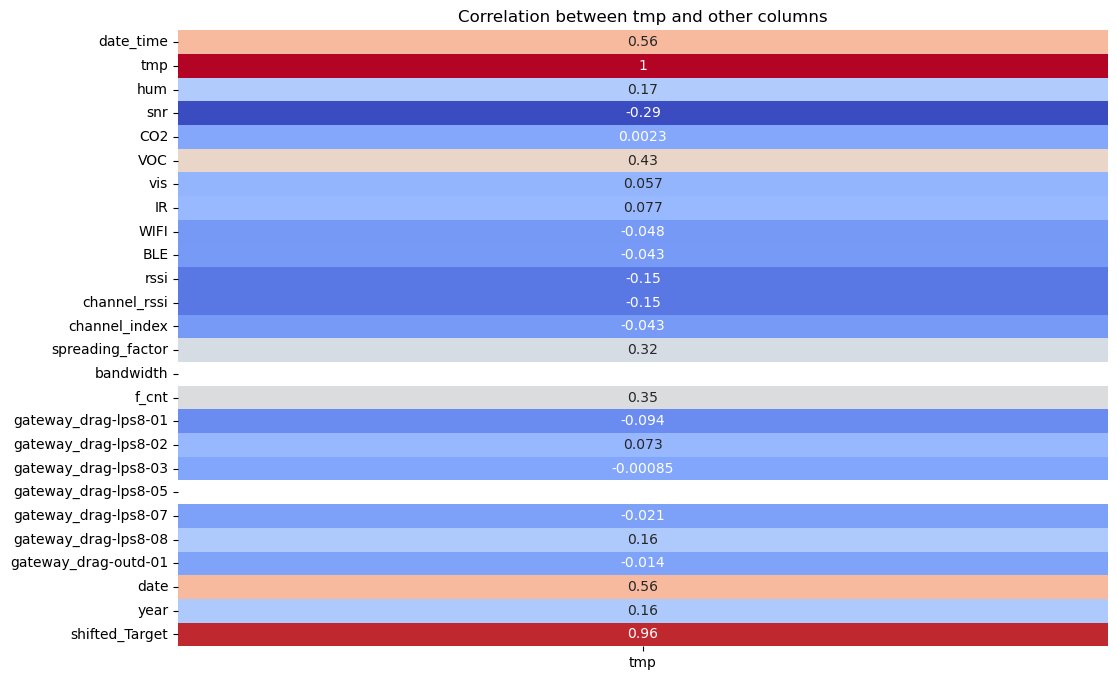

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.drop("device_id",axis=1).corr()['tmp']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between tmp and other columns')
plt.show()